In [1]:
import scipy as sc
import numpy as np
import pandas as pd
import time
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [58]:
RAW_data = pd.read_csv('BASE_clean_college_score_card_data.csv', index_col=0)
data = RAW_data.iloc[:,3:]

In [59]:
data.fillna(value=0, inplace=True)

In [60]:
data = data.fillna(0)
sacled_data = pd.DataFrame(scale(data))

C:\Users\Jon78\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [61]:
# Kmean clustering with k=5 and # it as a column to the dataframe indicate the cluster
cluster = KMeans(n_clusters=5, n_init=1, init='random', max_iter=1)
result = cluster.fit_predict(sacled_data)

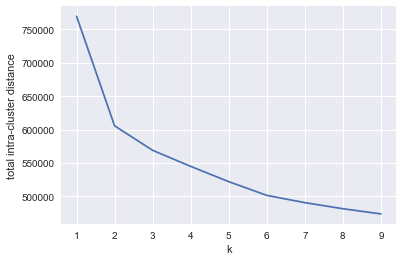

In [63]:
# Find the optimal k value
ks = range(1,10)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(sacled_data)
    scores.append(-model.score(sacled_data))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()
# Best k value is 2 